In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## load data and some formatting

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-100k.zip',
        tmpdir + '/ml-100k.zip')
    zipfile.ZipFile(tmpdir + '/ml-100k.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-100k']).decode('utf-8'))

    interactions = pd.read_csv(
        tmpdir + '/ml-100k/u.data',
        sep='\t',
        names=['USER_ID','ITEM_ID','RATING', 'TIMESTAMP'])

    users = pd.read_csv(
        tmpdir + '/ml-100k/u.user',
        sep='|',
        names=['USER_ID','AGE','GENDER','OCCUPATION','ZIPCODE'],
    )

    items = pd.read_csv(
        tmpdir + '/ml-100k/u.item',
        sep='|', encoding='latin1',
        names=['ITEM_ID', '_TITLE', 'CREATION_TIMESTAMP', '_', '_IMDb_URL'] + ['GENRE.%s'%i for i in range(19)],
    )

allbut.pl
mku.sh
README
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test
u.data
u.genre
u.info
u.item
u.occupation
u.user



In [3]:
# CREATION_TIMESTAMP may become a reserved keyword and its behavior may change without further notice.
items.loc[items['CREATION_TIMESTAMP'].notnull(), 'CREATION_TIMESTAMP'] = items['CREATION_TIMESTAMP'].dropna().apply(
    lambda x:datetime.datetime.strptime(str(x), '%d-%b-%Y').timestamp())
items.fillna({'CREATION_TIMESTAMP': items['CREATION_TIMESTAMP'].min()}, inplace=True)

## run diagnose scripts

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
       USER_ID  ITEM_ID  RATING  TIMESTAMP
22464      482      321       3  887644023
36283      592      425       5  882956467
83241      551       82       5  892783525
58280      706      331       5  880996945
96387       56      871       2  892910207
68860      498      109       3  881955189
20393      343      463       4  876404793
84268      870      188       5  875050672
26752       21      240       4  874951245
84397      598      748       4  886711034

=== Interactions table, original shape=(100000, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (100000, 4)
duplication rate 0.0
drop_duplicates shape (100000, 4)
user item repeat rate 0.0

=== Describe interactions table ===

              RATING     TIMESTAMP
count  100000.000000  1.000000e+05
mean        3.529860  8.835289e+08
std         1.125674  5.343856e+06


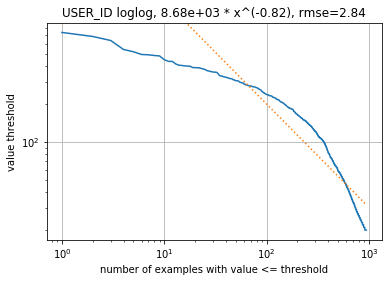


=== ITEM_ID top 10 categories ===
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
dtype: int64


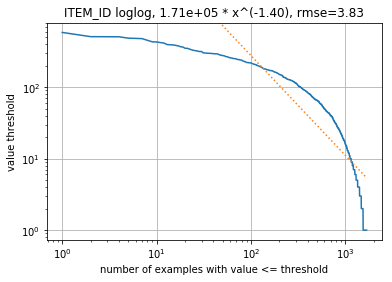


=== Sequence analysis ===


=== Hourly activity pattern ===
0     5172
1     5135
2     4644
3     4853
4     4246
5     4190
6     3500
7     1540
8     1133
9     1951
10    1185
11     637
12     956
13    1662
14    3149
15    3107
16    5426
17    6278
18    6755
19    7112
20    6265
21    8191
22    7231
23    5682
dtype: int64

=== Day of week activity pattern ===
0    13174
1    13933
2    16621
3    13364
4    15918
5    15077
6    11913
dtype: int64


/home/yifeim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


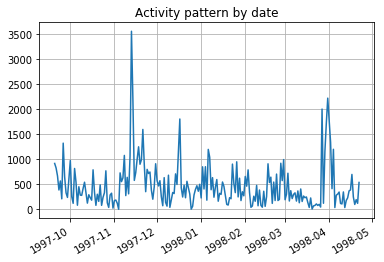

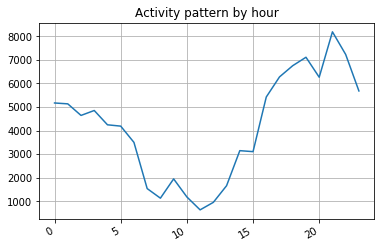

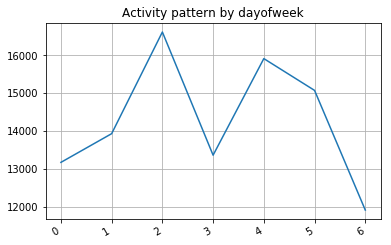


=== session time delta describe ===
count    9.905700e+04
mean     1.921129e+04
std      2.886168e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.700000e+01
max      1.749021e+07
Name: TIMESTAMP, dtype: float64


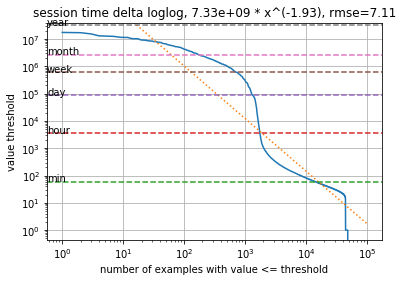

/home/yifeim/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


=== user time span describe ===
count    9.430000e+02
mean     2.018041e+06
std      4.389324e+06
min      1.200000e+02
25%      1.057000e+03
50%      2.961000e+03
75%      7.398970e+05
max      1.836258e+07
Name: TIMESTAMP, dtype: float64


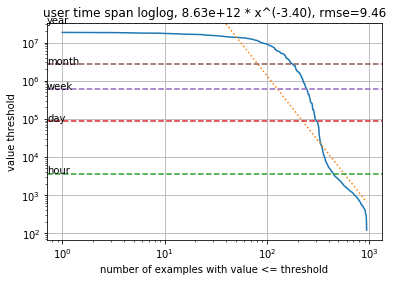


=== Temporal shift analysis ===



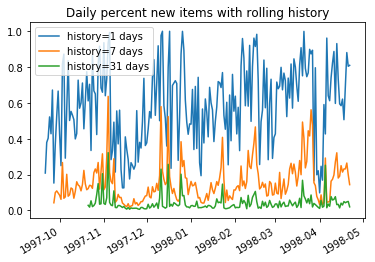

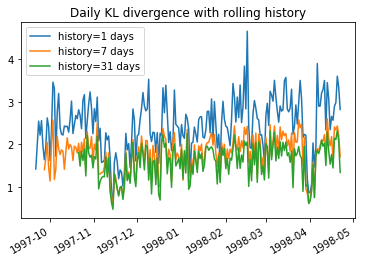

=== number of days when an item stays as daily top-1 ===
ITEM_ID
313    22
50     19
286     9
258     9
100     9
1       8
127     6
288     6
7       5
181     4
dtype: int64
=== number of days when an item stays in daily top-5 ===
ITEM_ID
313    53
50     45
258    37
288    35
294    31
100    29
286    29
300    26
181    24
121    22
dtype: int64
########################################
# DIAGNOSING USERS TABLE, SAMPLE:
########################################
     USER_ID  AGE GENDER     OCCUPATION ZIPCODE
37        38   28      F          other   54467
935      936   24      M          other   32789
54        55   37      M     programmer   01331
171      172   55      M      marketing   22207
802      803   70      M  administrator   78212
582      583   44      M       engineer   29631
663      664   30      M       engineer   94115
797      798   40      F         writer   64131
781      782   21      F         artist   33205
764      765   31      M        student   33066


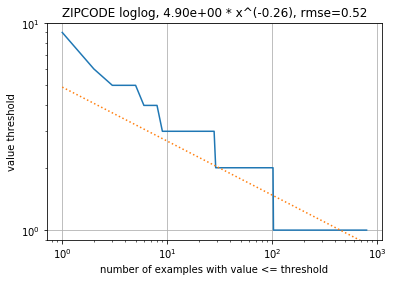

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:67: UserWarning: 
            Heavy-tail ZIPCODE distributions are usually hard to learn (slope=-0.2606131039384656)!
            Consider rolling up ZIPCODE or dropping its rare values.
            
  """.format(name, slope))


########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
      ITEM_ID                                   _TITLE  CREATION_TIMESTAMP  \
652       653                     Touch of Evil (1958)        -378691200.0   
1544     1545                 Frankie Starlight (1995)         788918400.0   
361       362               Blues Brothers 2000 (1998)         886723200.0   
901       902                 Big Lebowski, The (1998)         883094400.0   
1464     1465       Last Summer in the Hamptons (1995)         788918400.0   
903       904  Ma vie en rose (My Life in Pink) (1997)         883094400.0   
1242     1243                       Night Flier (1997)         886723200.0   
46         47                           Ed Wood (1994)         757382400.0   
1642     1643                        Angel Baby (1995)         852854400.0   
740       741                  Last Supper, The (1995)         828662400.0   

       _                 

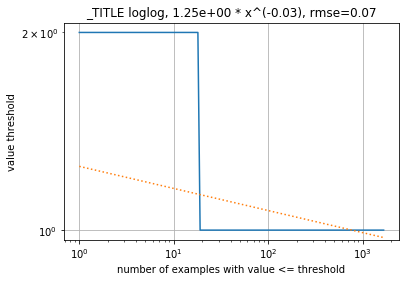

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:67: UserWarning: 
            Heavy-tail _TITLE distributions are usually hard to learn (slope=-0.0336603600865235)!
            Consider rolling up _TITLE or dropping its rare values.
            
  """.format(name, slope))



=== _IMDb_URL top 10 categories ===
nan                                                                            3
http://us.imdb.com/M/title-exact?Kull+the+Conqueror+(1997)                     2
http://us.imdb.com/M/title-exact?Hugo+Pool+(1997)                              2
http://us.imdb.com/M/title-exact?Liar+(1997)                                   2
http://us.imdb.com/M/title-exact?Ulee%27s+Gold+(1997)                          2
http://us.imdb.com/M/title-exact?Designated%20Mourner%2C%20The%20%281997%29    2
http://us.imdb.com/M/title-exact?Ice+Storm%2C+The+(1997)                       2
http://us.imdb.com/M/title-exact?Chasing+Amy+(1997)                            2
http://us.imdb.com/Title?Hurricane+Streets+(1998)                              2
http://us.imdb.com/M/title-exact?Nightwatch%20(1997)                           2
dtype: int64


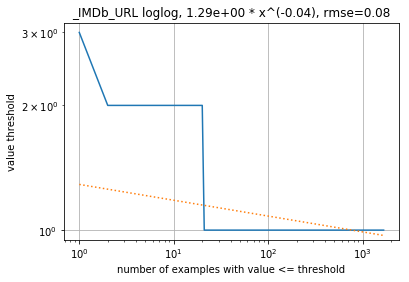

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:67: UserWarning: 
            Heavy-tail _IMDb_URL distributions are usually hard to learn (slope=-0.03824519783286988)!
            Consider rolling up _IMDb_URL or dropping its rare values.
            
  """.format(name, slope))


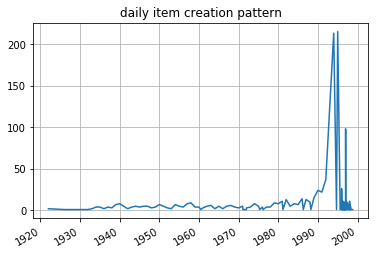

In [4]:
diagnose(interactions, users, items)

# another set of examples

In [5]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-1m.zip',
        tmpdir + '/ml-1m.zip')
    zipfile.ZipFile(tmpdir + '/ml-1m.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-1m']).decode('utf-8'))
    
    interactions = pd.read_csv(
        tmpdir + '/ml-1m/ratings.dat',
        sep='::',
        names=['USER_ID','ITEM_ID','RATING', 'TIMESTAMP'])

    users = pd.read_csv(
        tmpdir + '/ml-1m/users.dat',
        sep='::',
        names=['USER_ID','GENDER','AGE','OCCUPATION','ZIPCODE'],
    )

    items = pd.read_csv(
        tmpdir + '/ml-1m/movies.dat',
        sep='::', encoding='latin1',
        names=['ITEM_ID', '_TITLE', 'GENRES'],
    )

movies.dat
ratings.dat
README
users.dat



/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warni

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
        USER_ID  ITEM_ID  RATING  TIMESTAMP
329476     1943     3365       3  975734542
237961     1447     1363       3  984475415
963976     5812      270       2  957942349
939071     5667     1101       4  958755246
455895     2807     3359       4  972785598
489860     3014     2997       3  970710931
549284     3389       50       5  967511734
183171     1141     1126       4  974877134
31064       208     1960       4  984513060
123396      796     2100       1  975416545

=== Interactions table, original shape=(1000209, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (1000209, 4)
duplication rate 0.0
drop_duplicates shape (1000209, 4)
user item repeat rate 0.0

=== Describe interactions table ===

             RATING     TIMESTAMP
count  1.000209e+06  1.000209e+06
mean   3.581564e+00  9.722437e+08
std    1.117102e+00  1.2

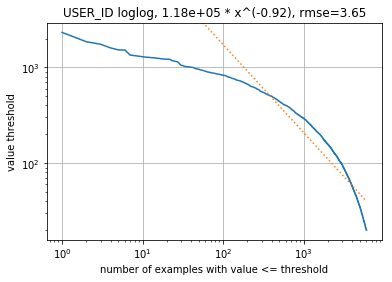


=== ITEM_ID top 10 categories ===
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
dtype: int64


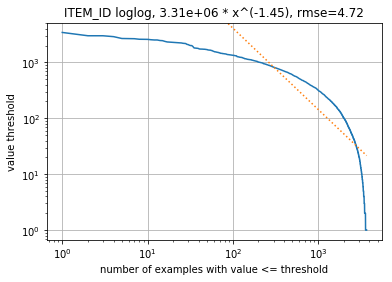


=== Sequence analysis ===


=== Hourly activity pattern ===
0     55397
1     58223
2     59068
3     62396
4     55443
5     42064
6     33987
7     27519
8     20547
9     12959
10     9370
11     8617
12    13221
13    20917
14    28865
15    40385
16    48954
17    53565
18    59138
19    59201
20    59709
21    65491
22    55098
23    50075
dtype: int64

=== Day of week activity pattern ===
0    173931
1    159272
2    141176
3    142722
4    129438
5    108692
6    144978
dtype: int64


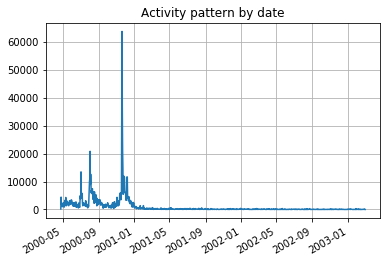

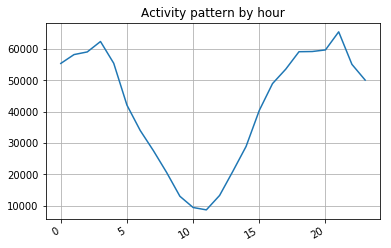

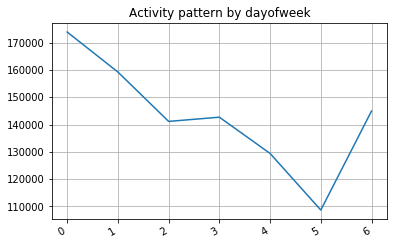


=== session time delta describe ===
count    9.941690e+05
mean     4.986574e+04
std      9.525371e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+01
max      8.892327e+07
Name: TIMESTAMP, dtype: float64


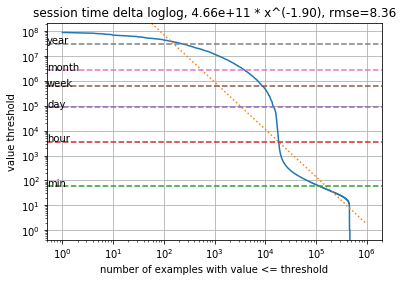

/home/yifeim/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


=== user time span describe ===
count    6.040000e+03
mean     8.207777e+06
std      1.917298e+07
min      1.060000e+02
25%      1.207500e+03
50%      4.068500e+03
75%      2.021375e+06
max      8.924779e+07
Name: TIMESTAMP, dtype: float64


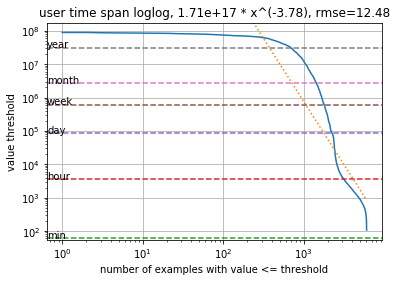


=== Temporal shift analysis ===



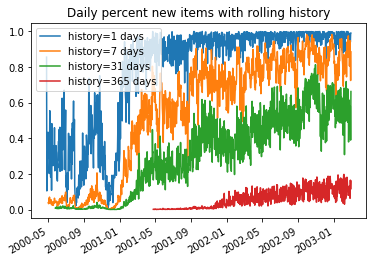

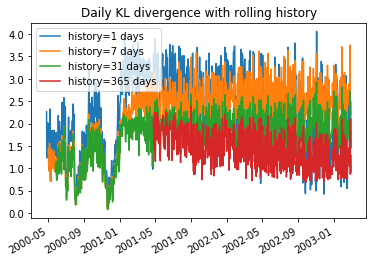

=== number of days when an item stays as daily top-1 ===
ITEM_ID
2858    59
3897    23
1196    23
260     18
3578    17
3948    17
3317    15
1210    15
3911    13
2762    12
dtype: int64
=== number of days when an item stays in daily top-5 ===
ITEM_ID
2858    123
1210     82
260      80
1196     80
3897     61
3578     51
480      50
2028     49
3911     49
593      48
dtype: int64
########################################
# DIAGNOSING USERS TABLE, SAMPLE:
########################################
      USER_ID GENDER  AGE  OCCUPATION ZIPCODE
1867     1868      M   50          11   92346
3839     3840      F   25           0   02176
5368     5369      M   25          15   02139
1985     1986      M   50          13   91977
2836     2837      M   18           0   49506
1364     1365      F    1          10   61665
4377     4378      M   18          17   06040
620       621      M   18           4   93560
4152     4153      M   50          17   16801
1722     1723      M   35          17 

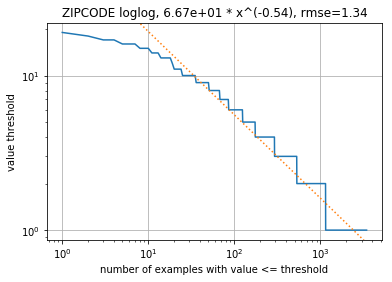

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:67: UserWarning: 
            Heavy-tail ZIPCODE distributions are usually hard to learn (slope=-0.5392588567551565)!
            Consider rolling up ZIPCODE or dropping its rare values.
            
  """.format(name, slope))


########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
      ITEM_ID                                     _TITLE  \
1673     1722                 Tomorrow Never Dies (1997)   
2239     2308                        Detroit 9000 (1973)   
2378     2447                       Varsity Blues (1999)   
1312     1332                      Believers, The (1987)   
170       172                     Johnny Mnemonic (1995)   
1915     1984  Halloween III: Season of the Witch (1983)   
2538     2607                            Get Real (1998)   
3845     3915                           Girlfight (2000)   
3472     3541                     Third World Cop (1999)   
2230     2299            Battle of the Sexes, The (1959)   

                       GENRES  
1673  Action|Romance|Thriller  
2239             Action|Crime  
2378             Comedy|Drama  
1312          Horror|Thriller  
170    Action|Sci-Fi|Thriller  
1915                   Horror  

/home/yifeim/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


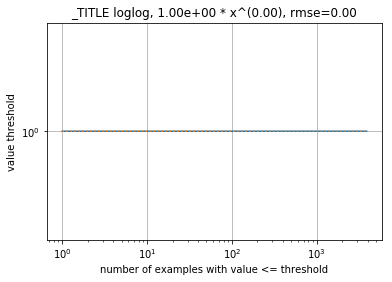


=== GENRES top 10 categories ===
Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
dtype: int64
CREATION_TIMESTAMP not found in items table


/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:67: UserWarning: 
            Heavy-tail _TITLE distributions are usually hard to learn (slope=0.0)!
            Consider rolling up _TITLE or dropping its rare values.
            
  """.format(name, slope))


In [6]:
diagnose(interactions, users, items)